In [ ]:
!pip install pandas numpy matplotlib seaborn yfinance ccxt MetaTrader5 backtrader tensorflow scikit-learn

  Using cached ccxt-4.4.61-py2.py3-none-any.whl.metadata (130 kB)
ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['XAUUSD=X']: YFTzMissingError('possibly delisted; no timezone found')


First 5 rows of the fetched data:
Empty DataFrame
Columns: [(Adj Close, XAUUSD=X), (Close, XAUUSD=X), (High, XAUUSD=X), (Low, XAUUSD=X), (Open, XAUUSD=X), (Volume, XAUUSD=X)]
Index: []


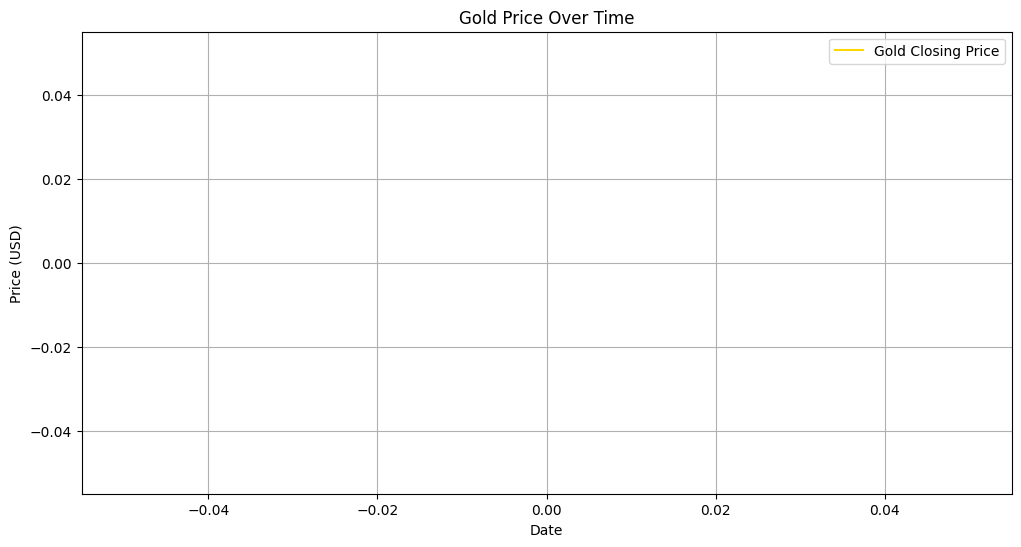

In [2]:
# Import the necessary libraries.
# 'yfinance' helps get market data from Yahoo Finance.
# 'pandas' is used to handle data in Dataframes format, which is very
   #-convienient for analysis.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


# Define the ticker symbol for Gold.
# In Yahoo Finance, gold against the US Dollar is
  #-typically represented as 'XAUUSD=X'.
ticker_symbol = 'XAUUSD=X'


# Define the time range for the historical data.
# 'start' sets the starting date for data fetching.
# 'end' sets the ending date. You can adjust these
   #-dates as needed.
start_date = "2024-10-01"
end_date = "2025-02-21"


# Use yfinance's download function to fetch historical data.
# The 'interval' parameter defines the data granularity;
  #-here we use '1h' for hourly data.
gold_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1h')


# Display the first few rows of the fetched data to understand
  #-its structure.
# This helps verify that data has been download correctly.
print("First 5 rows of the fetched data:")
print(gold_data.head())



#Plot the closing price to visualize the trend over time.
# Matplotlib is used for plotting; we set the figure size for clarity.
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Closing Price', color='gold')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

